# Text Classification Implementation

In this notebook, we will implement a text classification model using logistic regression. The steps include data loading, preprocessing, feature extraction, model training, and evaluation.

## 1. Import Necessary Libraries


In [26]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 2. Load the Dataset

We load the dataset from the specified CSV file into a pandas DataFrame and display the first few rows to understand its structure.


In [27]:
# Load the dataset
df = pd.read_csv('/Users/andrealoizidou/Desktop/capstone_project/UPDATED_cleaned_resume/data_generation.csv')

# Display the first few rows of the dataframe
df.head()


,Name,Text,Label
0,2_resume_job2_ChatGPT_1_cleaned,resume name address email phonenumber address ...,1.0
1,105_resume_job2_authentic_0_cleaned,name address email phonenumber holding 5 year...,0.0
2,31_resume_job1_authentic_0_cleaned,name net name address 21704 email phonenumber ...,0.0
3,142_resume_job2_authentic_0_cleaned,sqlssisssrs name name name email email locatio...,0.0
4,66_resume_job5_authentic_0_cleaned,name del name namename name address 33144 emai...,0.0


In [28]:
print(f"Original dataset size: {df.shape[0]}")  # Should print 1501
df_cleaned = df.dropna()
print(f"Dataset size after dropping missing values: {df_cleaned.shape[0]}")  # Should print 1481


Original dataset size: 1502
Dataset size after dropping missing values: 1481


## 3. Data Exploration and Preprocessing

Before proceeding, we check for any missing values and handle them appropriately. We also examine the distribution of labels to understand the balance of our dataset.
### Exploratory Data Analysis  
We visualize the distribution of labels (Authentic vs. Inauthentic resumes).



In [29]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Verify the distribution of labels
print("\nLabel distribution:")
print(df['Label'].value_counts())


Missing values in each column:
Name      1
Text     19
Label     3
dtype: int64

Label distribution:
Label
1.0    747
0.0    734
Name: count, dtype: int64


# Feature Engineering

In [30]:
! pip install nltk

    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [32]:
import nltk

In [34]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 3
Most common words: [('Name', 1), ('Text', 1), ('Label', 1)]


# Step 5: Text Preprocessing  
We clean the text by:
- Converting to lowercase
- Removing punctuation and special characters
- Removing extra whitespace


In [14]:
import re
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespace
    text = " ".join(text.split())
    
    return text

# Apply text cleaning function
df['Text'] = df['Text'].apply(clean_text)

# Display first few cleaned texts
df.head()


,Name,Text,Label
0,2_resume_job2_ChatGPT_1_cleaned,resume name address email phonenumber address ...,1.0
1,105_resume_job2_authentic_0_cleaned,name address email phonenumber holding 5 years...,0.0
2,31_resume_job1_authentic_0_cleaned,name net name address 21704 email phonenumber ...,0.0
3,142_resume_job2_authentic_0_cleaned,sqlssisssrs name name sharad khanal email emai...,0.0
4,66_resume_job5_authentic_0_cleaned,name del name namename name address 33144 emai...,0.0


## 4. Split the Data into Training and Testing Sets

We define our features (`Text`) and target variable (`Label`). The dataset is then split into training and testing sets, with 80% for training and 20% for testing. Stratified sampling ensures the label distribution remains consistent across both sets.


In [15]:
# Define features and target variable
X = df['Text']
y = df['Label']

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset sizes
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 1184
Testing samples: 297


## 5. Feature Extraction Using TF-IDF Vectorization

We use TF-IDF to convert text into numerical features:
- Maximum 5,000 most important words are selected.
- Stopwords (common words like 'the', 'is') are removed.



In [16]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display shape of transformed data
print(f"TF-IDF Train Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test Shape: {X_test_tfidf.shape}")


TF-IDF Train Shape: (1184, 5000)
TF-IDF Test Shape: (297, 5000)



## Train a Logistic Regression Model  
We train a Logistic Regression model on the TF-IDF transformed text data.


In [17]:
# Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## 7. Evaluate the Model

We assess the performance of our model by:
- Calculating the accuracy on the test set.
- Displaying a confusion matrix to visualize the model's performance across different classes.
- Providing a detailed classification report that includes precision, recall, and F1-score for each class.


Accuracy: 0.99


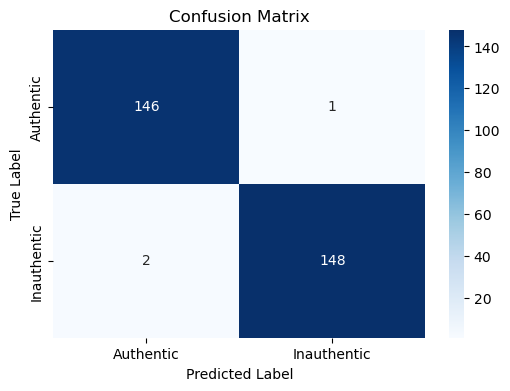


Classification Report:
              precision    recall  f1-score   support

   Authentic       0.99      0.99      0.99       147
 Inauthentic       0.99      0.99      0.99       150

    accuracy                           0.99       297
   macro avg       0.99      0.99      0.99       297
weighted avg       0.99      0.99      0.99       297



In [18]:
# Predict on the test set
y_pred = logreg.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Authentic', 'Inauthentic'], yticklabels=['Authentic', 'Inauthentic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Authentic', 'Inauthentic']))


In [8]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 1184
Testing samples: 297


In [9]:
print(df.isnull().sum())  # Check for missing values
print(df['Text'].apply(lambda x: len(x.split())).describe())  # Word count analysis


Name     0
Text     0
Label    0
dtype: int64
count    1481.000000
mean      502.098582
std       539.987970
min        11.000000
25%       177.000000
50%       323.000000
75%       587.000000
max      3954.000000
Name: Text, dtype: float64


In [10]:
print(f"TF-IDF Train Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test Shape: {X_test_tfidf.shape}")


TF-IDF Train Shape: (1184, 5000)
TF-IDF Test Shape: (297, 5000)


## 8. Save the Model and Vectorizer

To facilitate future predictions without retraining, we save the trained logistic regression model and the TF-IDF vectorizer to disk using `joblib`.


In [ ]:
# import joblib

# # Save the trained model
# joblib.dump(logreg, '/Users/andrealoizidou/Desktop/capstone_project/UPDATED_cleaned_resume/logistic_regression_model.pkl')

# # Save the TF-IDF vectorizer
# joblib.dump(tfidf_vectorizer, '/Users/andrealoizidou/Desktop/capstone_project/UPDATED_cleaned_resume/tfidf_vectorizer.pkl')
